In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import math

In [2]:
train0 = './trainingimages'
label0 = './traininglabels'
test1 = './testimages'
label1 = './testlabels'

In [3]:
# '' chuyển thành 0
# '+' '#' chuyển thành 1
def encode_images(train_x):
  for i in range(len(train_x)):
    for j in range(28):
      if train_x[i][j] == ' ':
        train_x[i][j] = 0
      else:
        train_x[i][j] = 1
  return train_x

# train_x = encode_images(train_x)
# train_x[0:28]

In [4]:
# đưa các ảnh về thành ma trận con 28 x 28
# tổng có 5000 ảnh 28 x 28
def images_train(train_x):
  N = 0
  array_images = []
  images = int(len(train_x) / 28)
  for i in range(images):
    array_images.append(train_x[N:N+28])
    N+=28
  return np.array(array_images)

# array_images = images_train(train0)
# array_images
# len(train_x)

In [5]:
# def group_digit(label, digit):
#   group_digit = {}
#   for i in range(len(label)):
#     if label[i] not in group_digit:
#       group_digit[label[i]] = []
#     group_digit[label[i]].append(digit[i].flatten())
#   return group_digit

# label_images = group_digit(label_x, train_x)

In [6]:
def readImage(trainImages, labelImages=None):
  images = open(trainImages, 'r')
  # labels = open(labelImages, 'r')
  images_ = [[character for character in line[:-1]] for line in images]
  # labels_ = [int(label[0:-1]) for label in labelslabels
  images_ = encode_images(images_)
  images_ = images_train(images_)
  # images_ = group_digit(labels_, images_)
  return images_

train_images = readImage(train0)
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
train_images.shape

(5000, 28, 28)

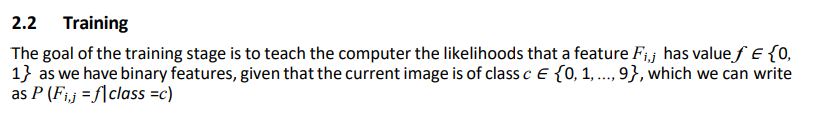
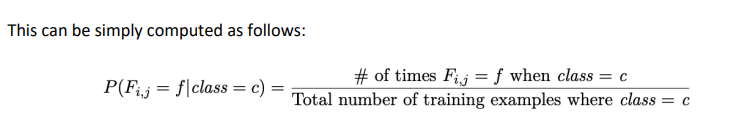

In [8]:
# Read labels
labels = open(label0, 'r')
train_labels = list([int(label[:-1]) for label in labels])
# len(train_labels)
train_labels[0:28]

[5,
 0,
 4,
 1,
 9,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 3,
 6,
 1,
 7,
 2,
 8,
 6,
 9,
 4,
 0,
 9,
 1,
 1,
 2,
 4,
 3]

In [9]:
def count_labels(train_labels):
  classes = {}
  for label in train_labels:
    if label in classes:
      classes[label] += 1
    else:
      classes[label] = 1
  return classes

number_per_train_labels = count_labels(train_labels)
number_per_train_labels

{5: 434,
 0: 479,
 4: 535,
 1: 563,
 9: 495,
 2: 488,
 3: 493,
 6: 501,
 7: 550,
 8: 462}

In [10]:
# Calculate probabitily for each of 10 classes
def probability_classes(train_labels):
  classes = count_labels(train_labels)
  return [classes[label]/len(train_labels) for label in sorted(classes.keys())]

classes_probability = probability_classes(train_labels)
classes_probability, sum(classes_probability)

([0.0958, 0.1126, 0.0976, 0.0986, 0.107, 0.0868, 0.1002, 0.11, 0.0924, 0.099],
 0.9999999999999999)

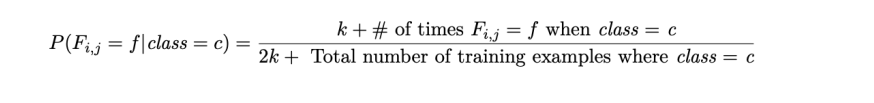

In [11]:
# tạo ma trận 28 x 28 x 10
# ma trận toàn số  1 để tính theo phương pháp Laplace Smoothing
images_matrix = [[[1 for i in range(0,28)] for j in range(0,28)] for _ in range(0,10)]

In [12]:
# tinh so feature Fi,j cua cac label(nhan)
# để tính xác suất Fi,j theo label
for image in range(len(train_images)):
  for x in range(len(train_images[image])):
    for y in range(len(train_images[image])):
      if train_images[image][x][y] == 1:
        images_matrix[train_labels[image]][x][y] += 1
images_matrix[0]

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  5,
  8,
  12,
  15,
  16,
  15,
  16,
  13,
  7,
  5,
  2,
  1,
  1,
  1,
  1,
  1,
  1],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  5,
  12,
  25,
  59,
  101,
  138,
  178,
  203,
  198,
  202,
  172,
  133,
  85,
  54,
  31,
  12,
  3,
  1,
  1,
  1],
 [1,
  1,
  1,
  1,
  1,
  1,
  2,
  4,
  14,
  40,
  89,
  131,
  196,
  269,
  326,
  365,
  373,
  362,
  307,
  250,
  172,
  120,
  62,
  27,
  5,
  1,
  1,
  1],
 [1,
  1,
  1,
  1,
  3,
  3,
  4,
  12,
  34,
  91,
  152,
  210,
  282,
  347,
  389,
  422,
  4

In [13]:
# đọc dữ liệu để test
test_images = readImage(test1)
# test_images[0]

In [14]:
# đọc nhãn của tệp dữ liệu test
test_labels = open(label1, 'r')
test_labels = [int(label[0:-1]) for label in test_labels]
test_labels[:10], type(test_labels)

([9, 0, 2, 5, 1, 9, 7, 8, 1, 0], list)

In [15]:
# đếm số ảnh thuộc các label của tệp dữ liệu test
number_per_test_labels = count_labels(test_labels)
number_per_test_labels

{9: 100, 0: 90, 2: 103, 5: 92, 1: 108, 7: 106, 8: 103, 4: 107, 6: 91, 3: 100}

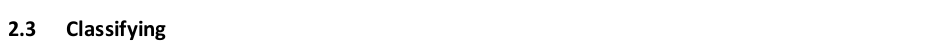
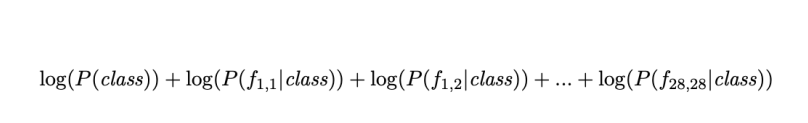
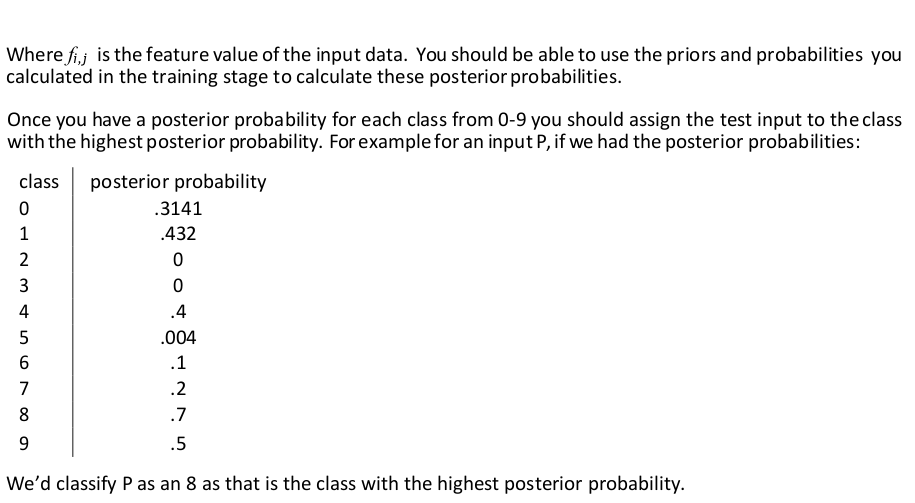

In [16]:
pred_labels = []
for image in range(0,1000):
  list_prob = []
  for label_ in range(0,10):
    log_p = 0
    for x in range(0,28):
      for y in range(0,28):
        if test_images[image][x][y] == 1:
          # Number of feature Fx,y + 1 (Laplace Smoothing)
          F_xy = images_matrix[label_][x][y]
          # Number of training examples where class = class_ + 784*1(Laplace Smoothing)
          number_classes = number_per_train_labels[label_] + 784*1
          # Probability of class where class = class_ in training set
          prob_class = classes_probability[label_]
          log_p += np.log(F_xy / number_classes * prob_class)
    log_p += np.log(number_per_test_labels[label_]/1000)

    list_prob.append([label_, log_p])
    # Find maximum of probability per label
  max_prob = max([prob[1] for prob in list_prob])
  for i in range(0,10):
    if list_prob[i][1] == max_prob:
      pred_labels.append(list_prob[i][0])

pred_labels[:20]

[7, 0, 2, 3, 8, 9, 7, 8, 1, 0, 4, 1, 9, 9, 0, 8, 2, 2, 8, 1]

In [17]:
print('\nSNO \t Given label \t Predicted label')
print('----\t-------------\t-----------------')
for i in range(1,30):
  print(i, '\t\t',test_labels[i-1], '\t\t', pred_labels[i-1])


SNO 	 Given label 	 Predicted label
----	-------------	-----------------
1 		 9 		 7
2 		 0 		 0
3 		 2 		 2
4 		 5 		 3
5 		 1 		 8
6 		 9 		 9
7 		 7 		 7
8 		 8 		 8
9 		 1 		 1
10 		 0 		 0
11 		 4 		 4
12 		 1 		 1
13 		 7 		 9
14 		 9 		 9
15 		 6 		 0
16 		 4 		 8
17 		 2 		 2
18 		 6 		 2
19 		 8 		 8
20 		 1 		 1
21 		 3 		 3
22 		 7 		 7
23 		 5 		 9
24 		 4 		 4
25 		 4 		 8
26 		 1 		 1
27 		 8 		 8
28 		 1 		 1
29 		 3 		 0


In [18]:
# tính độ chính xác của mô hình dự đoán
def accuracy_percentage(given_labels, predict_labels):
  count = 0
  for i in range(len(given_labels)):
    if predict_labels[i] == given_labels[i]:
      count += 1
  rate_pred = count / len(predict_labels)
  return rate_pred*100

print('Accuracy: {}%'.format(accuracy_percentage(test_labels, pred_labels)))

Accuracy: 70.3%


In [19]:
print("--------------- Confusion Matrix: ----------------\n")
givenValue = pd.Series(test_labels, name='Given')
predictedValue = pd.Series(pred_labels, name='Predicted')
confusionMatrix = pd.crosstab(givenValue, predictedValue)
confusionMatrix

--------------- Confusion Matrix: ----------------



Predicted,0,1,2,3,4,5,6,7,8,9
Given,,,,,,,,,,
0,88,0,0,0,0,0,0,0,2,0
1,0,89,2,3,0,0,1,0,13,0
2,6,0,83,4,2,0,5,0,3,0
3,1,0,1,86,0,0,1,5,1,5
4,0,0,2,0,88,0,5,1,5,6
5,13,0,1,29,9,1,2,3,30,4
6,5,0,6,0,2,0,72,0,6,0
7,2,2,3,1,5,0,0,81,7,5
8,2,0,3,23,8,0,0,5,62,0


In [20]:
number_per_test_labels

{9: 100, 0: 90, 2: 103, 5: 92, 1: 108, 7: 106, 8: 103, 4: 107, 6: 91, 3: 100}

In [22]:
normalize_confusion_matrix = confusionMatrix / confusionMatrix.sum(axis=1)
normalize_confusion_matrix.round(2)

Predicted,0,1,2,3,4,5,6,7,8,9
Given,,,,,,,,,,
0,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00
1,0.00,0.82,0.02,0.03,0.00,0.00,0.01,0.00,0.13,0.00
2,0.07,0.00,0.81,0.04,0.02,0.00,0.05,0.00,0.03,0.00
3,0.01,0.00,0.01,0.86,0.00,0.00,0.01,0.05,0.01,0.05
4,0.00,0.00,0.02,0.00,0.82,0.00,0.05,0.01,0.05,0.06
5,0.14,0.00,0.01,0.29,0.08,0.01,0.02,0.03,0.29,0.04
6,0.06,0.00,0.06,0.00,0.02,0.00,0.79,0.00,0.06,0.00
7,0.02,0.02,0.03,0.01,0.05,0.00,0.00,0.76,0.07,0.05
8,0.02,0.00,0.03,0.23,0.07,0.00,0.00,0.05,0.60,0.00
